# Interpolación con splines cúbicos

Dados los puntos:
\[
(-1,1),\ (0,5),\ (1,3)
\]

Se desea construir splines cúbicos y modificar las ecuaciones para que la pendiente
en el punto \((x_1, y_1) = (0,5)\) sea \(m = -2\).


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
x = np.array([-1.0, 0.0, 1.0])
y = np.array([1.0, 5.0, 3.0])


Un spline cúbico en el intervalo \([x_i, x_{i+1}]\) tiene la forma:

\[
S_i(x) = a_i + b_i(x-x_i) + c_i(x-x_i)^2 + d_i(x-x_i)^3
\]

Se imponen las condiciones de interpolación, continuidad de derivadas
y una condición adicional de pendiente:
\[
S_0'(x_1) = m = -2
\]


In [2]:
# Intervalos
h0 = x[1] - x[0]  # [-1,0]
h1 = x[2] - x[1]  # [0,1]

# Incógnitas:
# S0: a0, b0, c0, d0
# S1: a1, b1, c1, d1


In [3]:
A = np.array([
    # S0(x0) = y0
    [1, 0, 0, 0, 0, 0, 0, 0],
    # S0(x1) = y1
    [1, h0, h0**2, h0**3, 0, 0, 0, 0],
    # S1(x1) = y1
    [0, 0, 0, 0, 1, 0, 0, 0],
    # S1(x2) = y2
    [0, 0, 0, 0, 1, h1, h1**2, h1**3],
    # S0'(x1) = m
    [0, 1, 2*h0, 3*h0**2, 0, 0, 0, 0],
    # S0'(x1) = S1'(x1)
    [0, 1, 2*h0, 3*h0**2, 0, -1, 0, 0],
    # S0''(x1) = S1''(x1)
    [0, 0, 2, 6*h0, 0, 0, -2, 0],
    # S1''(x2) = 0
    [0, 0, 0, 0, 0, 0, 2, 6*h1]
])

b = np.array([
    y[0],
    y[1],
    y[1],
    y[2],
    -2,   # pendiente deseada
    0,
    0,
    0
])


In [4]:
coef = np.linalg.solve(A, b)
coef


array([  1.,  16., -18.,   6.,   5.,  -2.,   0.,   0.])

In [5]:
a0, b0, c0, d0, a1, b1, c1, d1 = coef

def S0(x):
    return a0 + b0*(x+1) + c0*(x+1)**2 + d0*(x+1)**3

def S1(x):
    return a1 + b1*(x) + c1*(x)**2 + d1*(x)**3


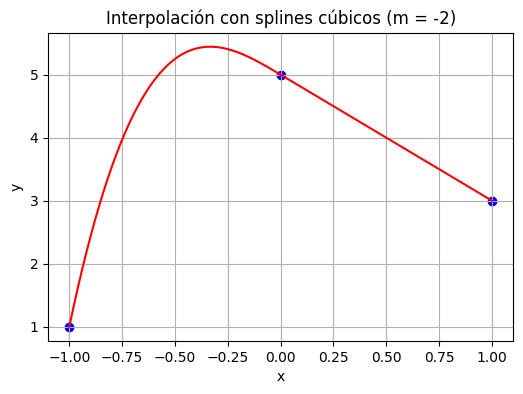

In [6]:
xx0 = np.linspace(-1, 0, 200)
xx1 = np.linspace(0, 1, 200)

plt.figure(figsize=(6,4))
plt.plot(xx0, S0(xx0), 'r')
plt.plot(xx1, S1(xx1), 'r')
plt.scatter(x, y, color='blue')
plt.title("Interpolación con splines cúbicos (m = -2)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()
